In [5]:
import matplotlib.pyplot as plt

#
# Plots the evolution of the training accuracy and loss
#
def plot(h,epochs):
    LOSS = 0; ACCURACY = 1
    training = np.zeros((2,epochs)); testing = np.zeros((2,epochs))
    training[LOSS] = h.history['loss']
    testing[LOSS] = h.history['val_loss']    # validation loss
    training[ACCURACY] = h.history['mae']
    testing[ACCURACY] = h.history['val_mae']  # validation accuracy

    epochs = range(1,epochs+1)
    fig, axs = plt.subplots(1,2, figsize=(17,5))
    for i, label in zip((LOSS, ACCURACY),('loss', 'mae')):   
        axs[i].plot(epochs, training[i], 'b-', label='Training ' + label)
        axs[i].plot(epochs, testing[i], 'y-', label='Test ' + label)
        axs[i].set_title('Training and test ' + label)
        axs[i].set_xlabel('Epochs')
        axs[i].set_ylabel(label)
        axs[i].legend()
        axs[i].grid(True)
    plt.show()

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


# Load data
data = pd.read_csv('../data_generation/dataset/Musical_Instruments.csv')

# Map user and item IDs to integers
user_map = {uid: idx + 1 for idx, uid in enumerate(data['user_id'].unique())}
item_map = {iid: idx + 1 for idx, iid in enumerate(data['parent_asin'].unique())}

data['user_id_num'] = data['user_id'].map(user_map)
data['item_id'] = data['parent_asin'].map(item_map)

# Count users/items
NUM_USERS = len(user_map)
NUM_ITEMS = len(item_map)

print('Number of users:', NUM_USERS)
print('Number of items:', NUM_ITEMS)

# Prepare data for the model
data = data[['user_id_num', 'item_id', 'rating']]

# Split
train, test = train_test_split(data, test_size=0.3, random_state=50)

# Convert to float32 arrays for Keras
train = train.to_numpy(dtype=np.float32)
test = test.to_numpy(dtype=np.float32)

# Define index positions
USER = 0
ITEM = 1
RATING = 2


Number of users: 57439
Number of items: 24587


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ item-input          │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ user-input          │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ item-embedding      │ (None, 1, 5)      │    122,940 │ item-input[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ user-embedding      │ (None, 1, 5)      │    287,200 │ user-input[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ item-flatten        │ (None, 5)         │          0 │ item-embedding[0… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ user-flatten        │ (None, 5)         │          0 │ user-embedding[0… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ item-user-concat    │ (None, 1)         │          0 │ item-flatten[0][… │
│ (Dot)               │                   │            │ user-flatten[0][… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 410,140 (1.56 MB)

 Trainable params: 410,140 (1.56 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
11197/11197 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - loss: 20.8009 - mae: 4.4371 - val_loss: 20.2936 - val_mae: 4.3794
Epoch 2/10
11197/11197 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - loss: 19.2388 - mae: 4.2480 - val_loss: 16.0443 - val_mae: 3.8023
Epoch 3/10
11197/11197 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - loss: 13.9411 - mae: 3.4858 - val_loss: 11.3176 - val_mae: 3.0462
Epoch 4/10
11197/11197 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - loss: 9.0544 - mae: 2.6491 - val_loss: 7.9316 - val_mae: 2.4277
Epoch 5/10
11197/11197 ━━━━━━━━━━━━━━━━━━━━ 27s 2ms/step - loss: 5.8299 - mae: 1.9996 - val_loss: 5.7234 - val_mae: 1.9705
Epoch 6/10
11197/11197 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - loss: 3.8413 - mae: 1.5372 - val_loss: 4.2931 - val_mae: 1.6393
Epoch 7/10
11197/11197 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - loss: 2.6345 - mae: 1.2177 - val_loss: 3.3609 - val_mae: 1.4030
Epoch 8/10
11197/11197 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - loss: 1.8950 - mae: 0.9970 - val_loss: 2.7442 - val_mae: 1.2350
Epoch 9/10

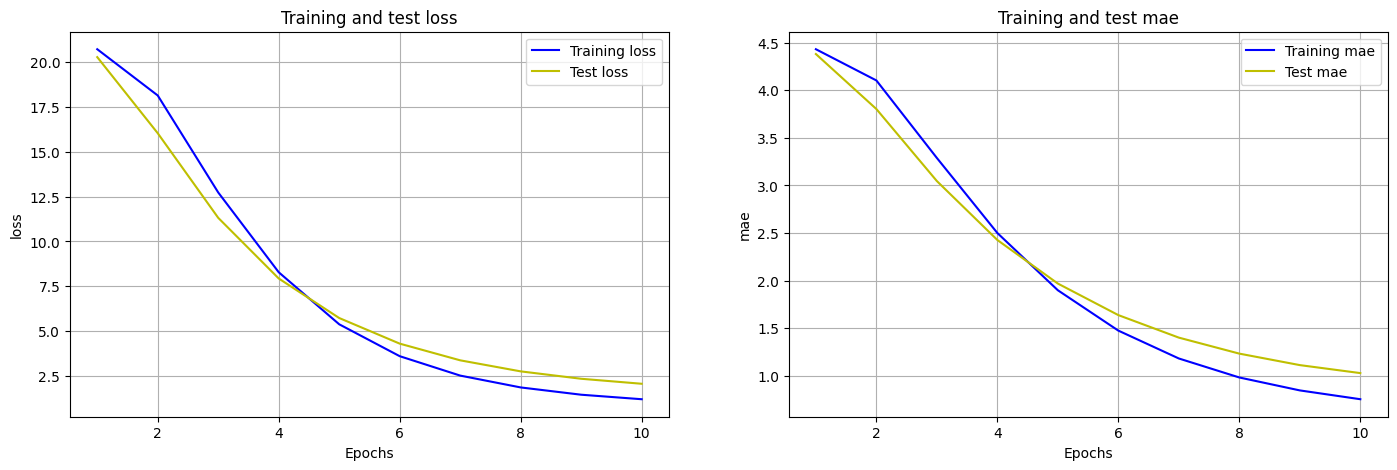

In [8]:
#
# Running DEEPMF to obtain the embedding weights (both users and items)
#
from keras.models import Model, Sequential
from keras.layers import Embedding, Flatten, Input, Dropout, Dense, Concatenate, Dot
from keras.optimizers import Adam

latent_dim = 5  # 5 neurons in the embedding can adequately code both the user and items

item_input = Input(shape=[1],name='item-input')
item_embedding = Embedding(NUM_ITEMS + 1, latent_dim, name='item-embedding')(item_input)
item_vec = Flatten(name='item-flatten')(item_embedding)

user_input = Input(shape=[1],name='user-input')
user_embedding = Embedding(NUM_USERS + 1, latent_dim, name='user-embedding')(user_input)
user_vec = Flatten(name='user-flatten')(user_embedding)

dot = Dot(axes=1,name='item-user-concat')([item_vec, user_vec])

model_deepMF = Model([user_input, item_input], dot)
model_deepMF.compile(optimizer='adam', metrics=['mae'], loss='mean_squared_error')

model_deepMF.summary()

EPOCHS = 10
history_deepMF = model_deepMF.fit([train[:,USER],train[:,ITEM]],train[:,RATING], 
                    validation_data=([test[:,USER],test[:,ITEM]], test[:,RATING]), 
                    epochs=EPOCHS, verbose=1)
plot(history_deepMF,EPOCHS)

In [9]:
# Save the model
model_deepMF.save('../data_generation/models/ModelDeepMF.h5')

In [10]:
from keras.models import Model

# we create two models, from model_deepMF, to get user's and item's embeddings
model_user_embeddings = Model(inputs=user_input, outputs=user_embedding)
model_item_embeddings = Model(inputs=item_input, outputs=item_embedding)

# obtaining all the existing users an items activation maps
user_embeddings = model_user_embeddings.predict(np.array(range(NUM_USERS+1)))
item_embeddings = model_item_embeddings.predict(np.array(range(NUM_ITEMS+1)))
    

1795/1795 ━━━━━━━━━━━━━━━━━━━━ 0s 264us/step
769/769 ━━━━━━━━━━━━━━━━━━━━ 0s 265us/step


In [11]:
import random

#
# creates the dataset of real samples: <user embedding, item embedding, rating>
#
def get_dataset(data):
    embedding_dataset = np.zeros((len(data)+1,latent_dim * 2)) 
    ratings = np.zeros((len(data)+1))
    for i in range(len(data)):
        user_embedding = user_embeddings[int(data[i,USER])][0]
        item_embedding = item_embeddings[int(data[i,ITEM])][0]
        ratings[i] = (data[i,RATING]- 3.0) / 4.0   # normalized -0.5 to 0.5
        embedding_dataset[i] = np.concatenate((user_embedding, item_embedding))
    # add ratings
    embedding_dataset = np.insert(embedding_dataset, latent_dim * 2, ratings, axis=1)
    return embedding_dataset

# train and test embeddings and ratings old_datasets (positive values)
embedding_dataset = get_dataset(np.array(data))
np.save('../data_generation/models/embedding_dataset.npy', embedding_dataset)


In [14]:
 #
# GAN to create the fake samples.
# Both the generator and the discriminator models are really small because the source samples are not
# large and sparse vectors; they are small and dense: 5 real number to code the user, 5 real numbers to 
# code the item and a real number to code the normalized rating.
#
from keras.models import Model, Sequential
from keras.layers import Embedding, Flatten, Input, Dropout, Dense, Concatenate, Dot, LeakyReLU, BatchNormalization
from keras.optimizers import Adam

class GAN():
    def __init__(self):
        self.latent_dim = latent_dim
        self.noise_dim = 100

        optimizer_d = Adam(0.0006, 0.5)
        optimizer_g = Adam(0.00001, 0.5)

        # Build and compile the discriminator
        self.discriminator = self.build_discriminator()
        self.discriminator.compile(loss='binary_crossentropy',
            optimizer=optimizer_d,
            metrics=['accuracy'])

        # Build the generator
        self.generator = self.build_generator()

        # The generator takes noise as input and generates user
        z = Input(shape=(self.noise_dim,))
        fake_sample = self.generator(z)

        # For the combined model we will only train the generator
        self.discriminator.trainable = False

        # The discriminator takes generated users as input and determines validity
        validity = self.discriminator(fake_sample)

        # The combined model  (stacked generator and discriminator)
        # Trains the generator to fool the discriminator
        self.combined = Model(z, validity)
        self.combined.compile(loss='binary_crossentropy', optimizer=optimizer_g)


    def build_generator(self):

        model = Sequential()
        model.add(Dense(10, input_dim=self.noise_dim))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(20, input_dim=self.noise_dim))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.2))
        model.add(Dense(self.latent_dim*2+1, activation='linear'))
        model.summary()

        noise = Input(shape=(self.noise_dim,))
        fake_sample = model(noise)

        return Model(noise, fake_sample)

    
    def build_discriminator(self):

        model = Sequential()

        model.add(Dense(4, input_dim=self.latent_dim*2 + 1))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dense(1, activation='sigmoid'))
        model.summary()

        sample = Input(shape=(self.latent_dim*2 + 1,))
        validity = model(sample)

        return Model(sample, validity)

    
    def train(self, dataset, epochs, batch_size=128, sample_interval=50, num_training_samples=100000):

        # Adversarial ground truths
        valid = np.ones((batch_size, 1))
        fake = np.zeros((batch_size, 1))

        for epoch in range(epochs):

            # ---------------------
            #  Train Discriminator
            # ---------------------

            # Select a random batch of real samples
            idx = np.random.randint(0, num_training_samples, batch_size)
            real_samples = dataset[idx]
           
            noise = np.random.normal(0, 1, (batch_size, self.noise_dim))

            # Generate a batch of fake users
            fake_samples = self.generator.predict(noise, verbose=0)

            # Train the discriminator
            d_loss_real = self.discriminator.train_on_batch(real_samples, valid)
            d_loss_fake = self.discriminator.train_on_batch(fake_samples, fake)
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

            # ---------------------
            #  Train Generator
            # ---------------------

            noise = np.random.normal(0, 1, (batch_size, self.noise_dim))

            # Train the generator (to have the discriminator label samples as valid)
            g_loss = self.combined.train_on_batch(noise, valid)

            if epoch % sample_interval == 0:
                print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss))
                noise = np.random.normal(0, 1, (1, self.noise_dim))
            
           #if epoch > 0 and epoch % 2000 == 0:
            #    filename = f"gan_generator_epoch{epoch}.h5"
            #    self.generator.save(filename)
            #    print(f" Generator gespeichert: {filename}")

if __name__ == '__main__':
    gan = GAN()
    gan.train(embedding_dataset, epochs=20000, batch_size=32, sample_interval=200, 
              num_training_samples = len(embedding_dataset))
    gan.generator.save('../data_generation/models/GANRS.h5')
    

/Users/leonprivat/lenskit-env/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/leonprivat/lenskit-env/lib/python3.10/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 4)              │            48 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_6 (LeakyReLU)       │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 53 (212.00 B)

 Trainable params: 53 (212.00 B)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 10)             │         1,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_7 (LeakyReLU)       │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 20)             │           220 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_8 (LeakyReLU)       │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 11)             │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,501 (5.86 KB)

 Trainable params: 1,481 (5.79 KB)

 Non-trainable params: 20 (80.00 B)

/Users/leonprivat/lenskit-env/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py:83: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


0 [D loss: 0.408921, acc.: 75.78%] [G loss: 0.471618]
200 [D loss: 0.590271, acc.: 52.39%] [G loss: 0.466987]
400 [D loss: 0.595943, acc.: 52.20%] [G loss: 0.461343]
600 [D loss: 0.602434, acc.: 52.04%] [G loss: 0.455755]
800 [D loss: 0.609148, acc.: 51.85%] [G loss: 0.449366]
1000 [D loss: 0.615555, acc.: 51.70%] [G loss: 0.443285]
1200 [D loss: 0.622863, acc.: 51.56%] [G loss: 0.437636]
1400 [D loss: 0.629978, acc.: 51.43%] [G loss: 0.432253]
1600 [D loss: 0.638111, acc.: 51.32%] [G loss: 0.426409]
1800 [D loss: 0.644697, acc.: 51.21%] [G loss: 0.420992]
2000 [D loss: 0.652728, acc.: 51.13%] [G loss: 0.415583]
2200 [D loss: 0.659883, acc.: 51.04%] [G loss: 0.410313]
2400 [D loss: 0.667510, acc.: 50.97%] [G loss: 0.405058]
2600 [D loss: 0.675350, acc.: 50.91%] [G loss: 0.399636]
2800 [D loss: 0.683881, acc.: 50.85%] [G loss: 0.394547]
3000 [D loss: 0.691925, acc.: 50.80%] [G loss: 0.389434]
3200 [D loss: 0.699457, acc.: 50.75%] [G loss: 0.384153]
3400 [D loss: 0.708403, acc.: 50.72%] 

In [ ]:
import os
import statistics
import pandas as pd
import numpy as np
from keras.models import load_model
from sklearn.cluster import KMeans

# Nutzer-Item-Verhältnisse für Szenarien
ratios = [(1, 2), (1, 1), (2, 1)]
# Sparsitätslevel der Rating-Matrix
sparsity_levels = [0.90, 0.95, 0.97, 0.99]
target_matrix_size = 1_000_000
std = 1.5

GAN_PATH = "../data_generation/models/GANRS.h5"
EMBEDDING_PATH = "../data_generation/models/embedding_dataset.npy"
OUTPUT_DIR = "scenarios"
os.makedirs(OUTPUT_DIR, exist_ok=True)

# Matrixgröße berechnen
def get_shape_for_scenario_fixed_matrix_size(user_item_ratio, target_matrix_size):
    ratio_u, ratio_i = user_item_ratio
    scale = (target_matrix_size / (ratio_u * ratio_i)) ** 0.5
    return int(scale * ratio_u), int(scale * ratio_i)

# Ratings runden auf [1, 5]
def round_rating(r):
    return max(1, min(5, int(np.round(r))))

# Modelle laden
embedding_dataset = np.load(EMBEDDING_PATH)
gan = load_model(GAN_PATH, compile=False)

# Maximale Anzahl Ratings bestimmen
max_scenario_size = max([
    get_shape_for_scenario_fixed_matrix_size(ratio, target_matrix_size)[0] *
    get_shape_for_scenario_fixed_matrix_size(ratio, target_matrix_size)[1] *
    (1 - sparsity)
    for ratio in ratios for sparsity in sparsity_levels
])

FAKE_SAMPLES = int(max_scenario_size * 10)

noise_dim = gan.input_shape[1]
latent_dim = (gan.output_shape[1] - 1) // 2
noise = np.random.normal(0, std, (FAKE_SAMPLES, noise_dim))
augmented = gan.predict(noise)

# Ratings normalisieren
y = augmented[:, -1]
augmented[:, -1] *= statistics.mean(embedding_dataset[:, -1]) / statistics.mean(y)

sizes = []
scenario_id = 1

for ratio in ratios:
    for sparsity in sparsity_levels:
        n_users, n_items = get_shape_for_scenario_fixed_matrix_size(ratio, target_matrix_size)
        n_ratings = int(n_users * n_items * (1 - sparsity))

        # KMeans-Clustering
        clustering_users = KMeans(n_clusters=n_users, n_init=1, max_iter=100)
        cluster_users = clustering_users.fit_predict(augmented[:FAKE_SAMPLES, :latent_dim])
        clustering_items = KMeans(n_clusters=n_items, n_init=1, max_iter=100)
        cluster_items = clustering_items.fit_predict(augmented[:FAKE_SAMPLES, latent_dim:-1])

        triples = []
        used_pairs = set()

        for i in range(FAKE_SAMPLES):
            if len(triples) >= n_ratings:
                break
            user = int(cluster_users[i])
            item = int(cluster_items[i])
            if (user, item) in used_pairs:
                continue
            used_pairs.add((user, item))

            rating = augmented[i, -1] * 4. + 3.
            rating = round_rating(rating)
            triples.append([user, item, rating])

        if len(triples) < n_ratings:
            scenario_id += 1
            continue

        df = pd.DataFrame(triples, columns=['user', 'item', 'rating'])
        df.to_csv(os.path.join(OUTPUT_DIR, f"scenario{scenario_id:02d}.csv"), index=False)
        sizes.append([scenario_id, len(df)])
        scenario_id += 1